<a href="https://colab.research.google.com/github/tolutopea/Python_Dataframes/blob/master/Python_SQL_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a function that reverses a string

In [0]:
txt = "Almost Done" [::-1]
print(txt)

enoD tsomlA


Create a SQL query to combine all four tables in the bitcoinhistoricaldata database. Load the query results into a dataframe in Pandas, and do some exploratory data analysis. 

In [0]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'bitcoinhistoricaldata'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [0]:
sql = ''' 
         SELECT *, 'bitflyer' as coin from bitflyer UNION
        SELECT *, 'bitstamp' as coin from bitstamp UNION
        SELECT *, 'coinbase' as coin from coinbase UNION
        SELECT *, 'coincheck' as coin from coincheck
        '''
        
result = engine.execute(sql)
engine.dispose()
bitcoin_combo = pd.read_sql_query(sql,con= engine)
bitcoin_combo

  

,id,open,high,low,close,volume_btc,volume_currency,weighted_price,timestamp,coin
0,1,4.39,4.39,4.39,4.39,0.455581,2.000,4.390,2011-12-31 07:52:00,bitstamp
1,1,300.00,300.00,300.00,300.00,0.010000,3.000,300.000,2014-12-01 05:33:00,coinbase
2,1,36880.00,36880.00,36880.00,36880.00,0.095100,3507.290,36880.000,2014-10-31 06:12:00,coincheck
3,1,296127.00,296558.00,296016.00,296540.00,1.158600,343244.000,296258.000,2017-07-04 08:01:00,bitflyer
4,2,4.39,4.39,4.39,4.39,0.455581,2.000,4.390,2011-12-31 07:53:00,bitstamp
...,...,...,...,...,...,...,...,...,...,...
261991,65498,457379.00,457380.00,457379.00,457380.00,0.740000,338461.000,457379.000,2017-08-18 19:38:00,bitflyer
261992,65499,4.56,4.56,4.56,4.56,1.350000,6.156,4.560,2012-02-14 19:30:00,bitstamp
261993,65499,239.53,239.80,239.50,239.50,21.970000,5266.560,239.716,2015-02-25 05:45:00,coinbase
261994,65499,43540.00,43540.00,43540.00,43540.00,0.589600,25671.200,43540.000,2014-12-15 17:50:00,coincheck


In [0]:
bitcoin_combo[['open', 'high', 'low', 'close']].describe()

,open,high,low,close
count,261996.000000,261996.000000,261996.000000,261996.000000
mean,92022.618713,92103.282171,91957.846570,92039.478467
std,139334.736070,139427.759427,139234.093356,139328.560634
min,3.800000,3.800000,3.800000,3.800000
25%,84.247500,84.300000,84.247500,84.300000
50%,18009.000000,18009.000000,18009.000000,18009.000000
75%,92612.750000,92855.000000,92540.000000,92821.500000
max,498103.000000,498200.000000,497800.000000,498103.000000


In [0]:
clean_coins = bitcoin_combo.drop([0])
print(clean_coins.size)
print(bitcoin_combo.size)

2619950
2619960


In [0]:
import matplotlib.pyplot as plt

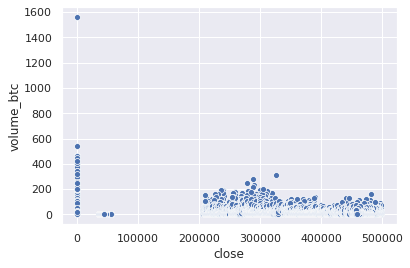

In [0]:
sns.scatterplot(x="close", y="volume_btc", data=clean_coins)

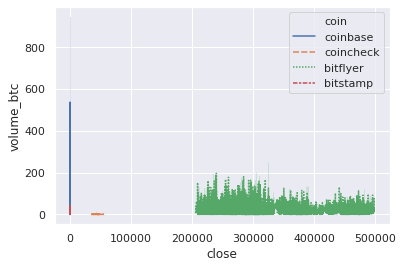

In [0]:
sns.lineplot(y="volume_btc", x="close", hue= 'coin', style= 'coin', data=clean_coins)

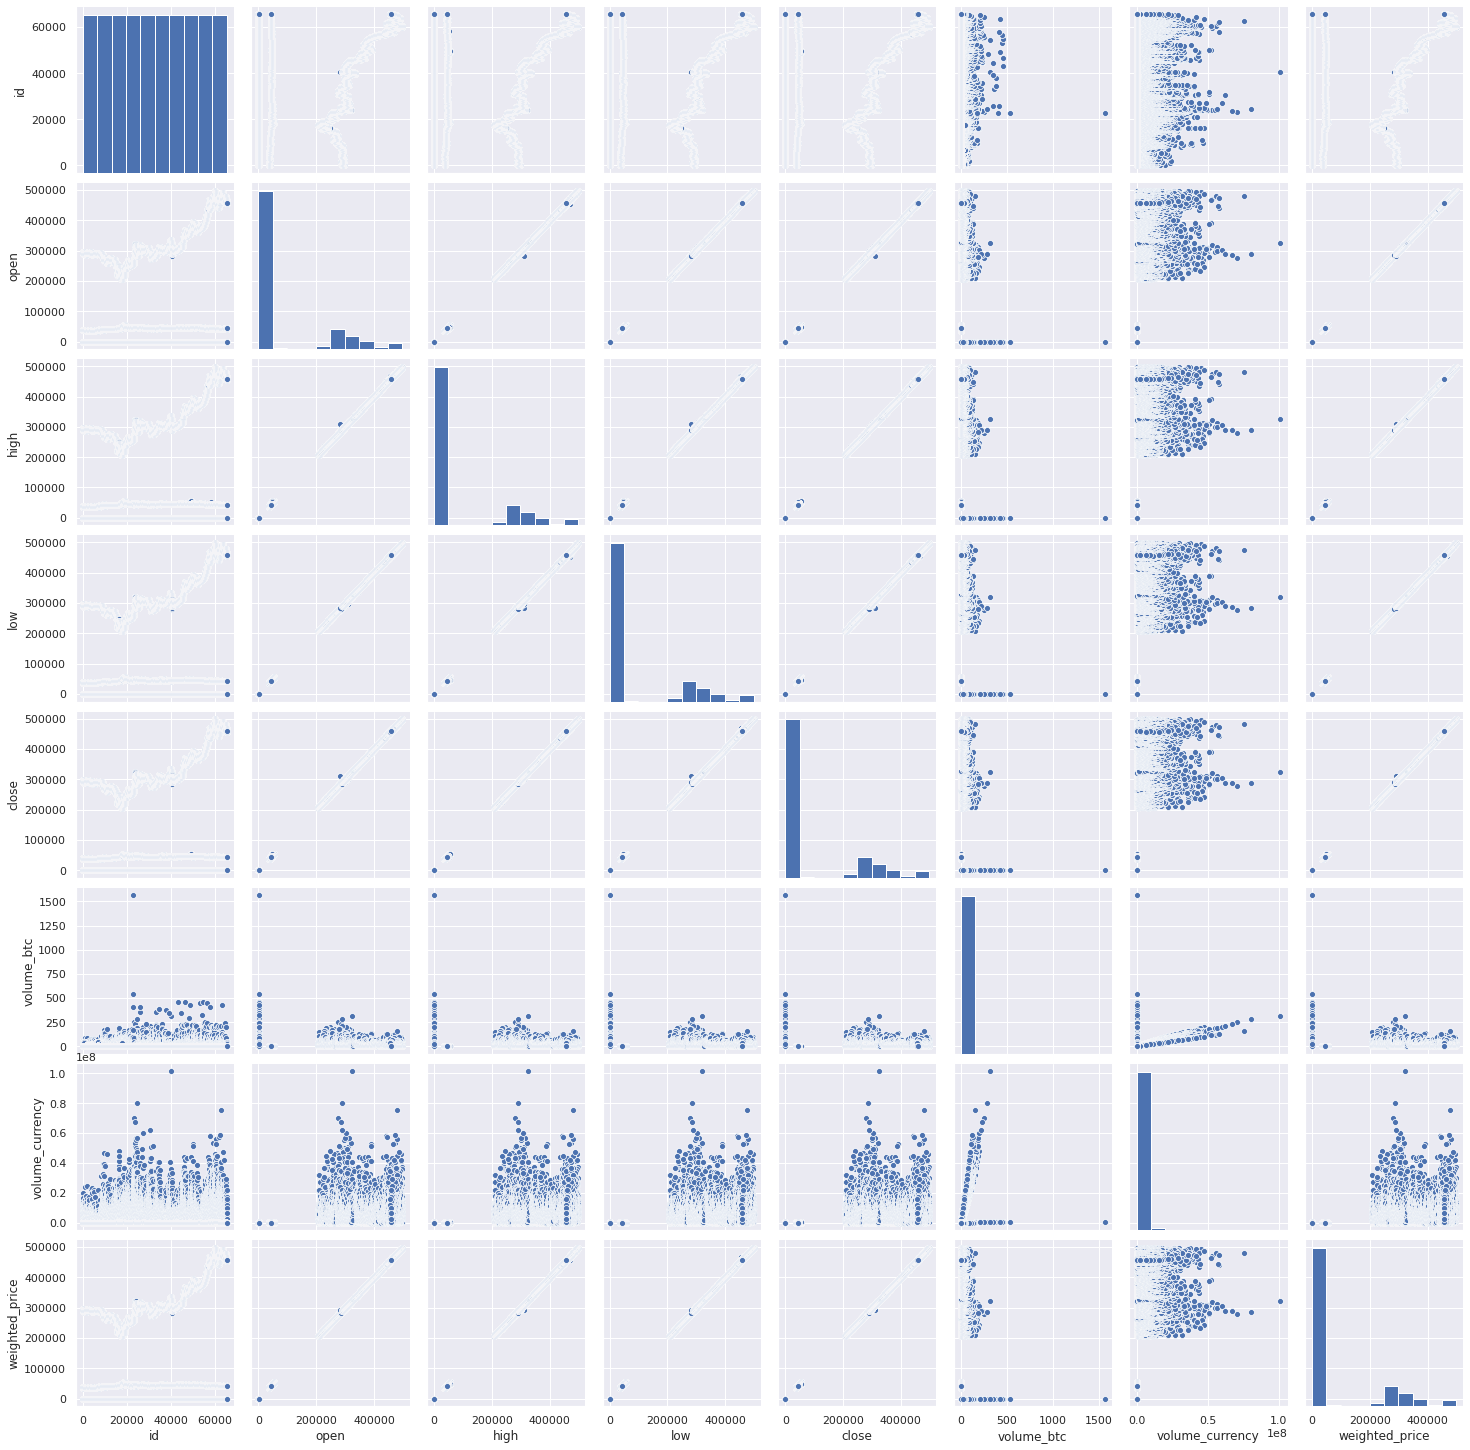

In [0]:
sns.pairplot(clean_coins)

In [0]:
print(clean_coins['open'].corr(clean_coins['close']))
# There is correlation between both columns. Almost perfect.

0.9999976308284151
